In [9]:
# import numpy and pandas
import numpy as np
import pandas as pd

In [10]:
# define number of runners to take from each dataset
numRunnersToAnalyze = 100;

In [11]:
# read several datasets
data1=pd.read_fwf('Women2015.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data1['year']=2015
data1['gender']='F'
data2=pd.read_fwf('Women2019.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data2['year']=2019
data2['gender']='F'
data3=pd.read_fwf('Men2015.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data3['year']=2015
data3['gender']='M'
data4=pd.read_fwf('Men2019.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data4['year']=2019
data4['gender']='M'

data5=pd.read_fwf('Women2013.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data5['year']=2013
data5['gender']='F'
data6=pd.read_fwf('Women2018.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data6['year']=2018
data6['gender']='F'
data7=pd.read_fwf('Men2013.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data7['year']=2013
data7['gender']='M'
data8=pd.read_fwf('Men2018.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data8['year']=2018
data8['gender']='M'

# concatenate the data into one data frame
final=pd.concat([data1, data2, data3, data4,data5,data6,data7,data8])
final.head()

,time,name,country,place,marathon,day,month,year,gender
0,2:19:25,Gladys CHERONO,KEN,1,Berlin,27,SEP,2015,F
1,2:19:52,Mare DIBABA,ETH,1,Xiamen,3,JAN,2015,F
2,2:20:02,Aselefech MERGIA,ETH,1,Dubai,23,JAN,2015,F
3,2:20:03,Gladys CHERONO,KEN,2,Dubai,23,JAN,2015,F
4,2:20:21,Lucy Wangui KABUU,KEN,3,Dubai,23,JAN,2015,F


In [13]:
def timeToSeconds(time):
    temp=time.split(':')
    return 3600*int(temp[0])+60*int(temp[1])+int(temp[2])

In [19]:
final['seconds']=final['time'].apply(lambda x: timeToSeconds(x))

In [20]:
final.head()

,time,name,country,place,marathon,day,month,year,gender,seconds
0,2:19:57,Rita Jeptoo,KEN,1,Chicago,13,OCT,2013,F,8397
1,2:20:15,Priscah Jeptoo,KEN,1,London,21,APR,2013,F,8415
2,2:20:48,Jemima Jelegat,KEN,2,Chicago,13,OCT,2013,F,8448
3,2:21:05,Feyse Tadesse,ETH,1,Paris,7,APR,2013,F,8465
4,2:21:13,Florence Kiplagat,KEN,1,Berlin,29,SEP,2013,F,8473


Output the file with time in seconds for use in KNIME

In [21]:
final.to_csv('outputforKNIME.csv')

In [22]:
groups=final.groupby(['year','gender']).describe()['seconds']

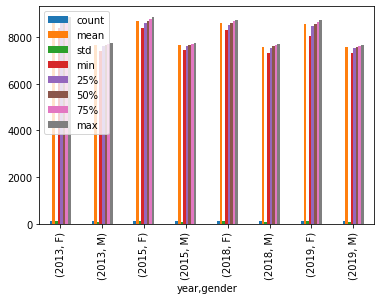

In [24]:
#matplotlibinline
groups.plot.bar()